In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# GATHER DATA

In [2]:
df = pd.read_csv("C:/Users/jaya2/OneDrive/Documents/final data.csv")
df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


# DATA PREPROCESSING

In [3]:
df.shape

(660679, 14)

In [4]:
#Checking for no.of column
df.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

In [5]:
#To check for the missing values in column
df.isnull().sum()


Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [6]:
#Dropping the missing values of other columns
df1 = df.dropna()
df1.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [7]:
#Duplicated rows
df.loc[df.duplicated()].head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
53086,2.01E+12,Slight,18-10-2019,53.970341,Daylight,Harrogate,-1.405573,1,2,Dry,Single carriageway,Rural,Other,Car
104225,2.01E+12,Slight,27-06-2019,52.647531,Daylight,Great Yarmouth,1.727655,1,2,Dry,Roundabout,Urban,Fine no high winds,Car
138811,2.01E+12,Slight,05-10-2019,51.360055,Daylight,Thanet,1.407403,1,2,Dry,Roundabout,Urban,Fine no high winds,Car
166633,2.01E+12,Slight,31-08-2019,51.478980,Daylight,Bridgend,-3.703668,1,1,Dry,Single carriageway,Urban,NaN,Car
229165,2.01E+12,Slight,31-10-2020,55.003273,Darkness - no lighting,North Tyneside,-1.490457,1,2,Wet or damp,Dual carriageway,Rural,Snowing + high winds,Car


In [8]:
#Dropping duplicated rows and missing values
df.loc[~df.duplicated()].reset_index(drop = True).copy()
df = df.dropna()

In [9]:
#Check for information concerning the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 642796 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    642796 non-null  object 
 1   Accident_Severity        642796 non-null  object 
 2   Accident Date            642796 non-null  object 
 3   Latitude                 642796 non-null  float64
 4   Light_Conditions         642796 non-null  object 
 5   District Area            642796 non-null  object 
 6   Longitude                642796 non-null  float64
 7   Number_of_Casualties     642796 non-null  int64  
 8   Number_of_Vehicles       642796 non-null  int64  
 9   Road_Surface_Conditions  642796 non-null  object 
 10  Road_Type                642796 non-null  object 
 11  Urban_or_Rural_Area      642796 non-null  object 
 12  Weather_Conditions       642796 non-null  object 
 13  Vehicle_Type             642796 non-null  object 
dtypes: float6

In [10]:
#Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,642796.0,52.554473,1.410298,49.914430,51.490413,52.304737,53.455597,60.757544
Longitude,642796.0,-1.425328,1.381917,-7.516225,-2.320826,-1.405574,-0.229388,1.762010
Number_of_Casualties,642796.0,1.360354,0.828114,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,642796.0,1.832897,0.716968,1.000000,1.000000,2.000000,2.000000,32.000000


In [11]:
df.describe(include = "object")

,Index,Accident_Severity,Accident Date,Light_Conditions,District Area,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
count,642796,642796,642796,642796,642796,642796,642796,642796,642796,642796
unique,410527,3,1461,5,422,5,5,3,8,16
top,2.01E+12,Slight,31-01-2019,Daylight,Birmingham,Dry,Single carriageway,Urban,Fine no high winds,Car
freq,232088,547721,679,471923,12980,433973,482274,408917,517874,484493


# EXPLORE DATA ANALYSIS

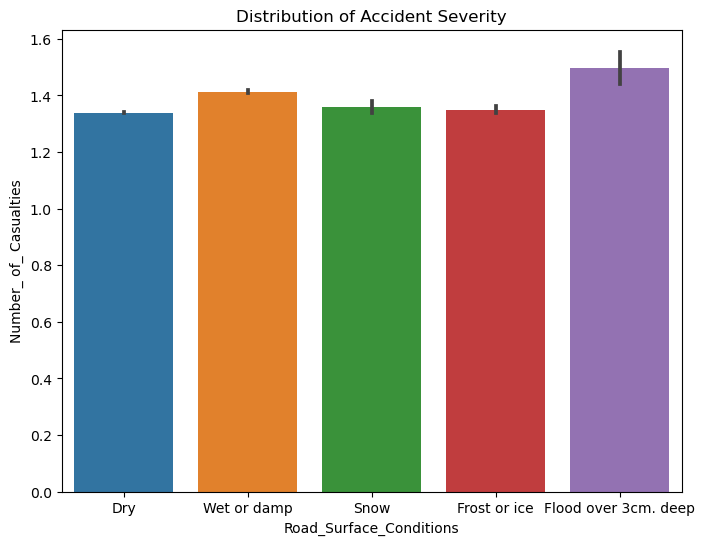

In [12]:
# Bar graph to understand accident severity
plt.figure(figsize=(8, 6))
sns.barplot(x = "Road_Surface_Conditions",y = "Number_of_Casualties",data = df)
plt.xlabel('Road_Surface_Conditions')
plt.ylabel('Number_ of_ Casualties')
plt.title('Distribution of Accident Severity')
plt.show()

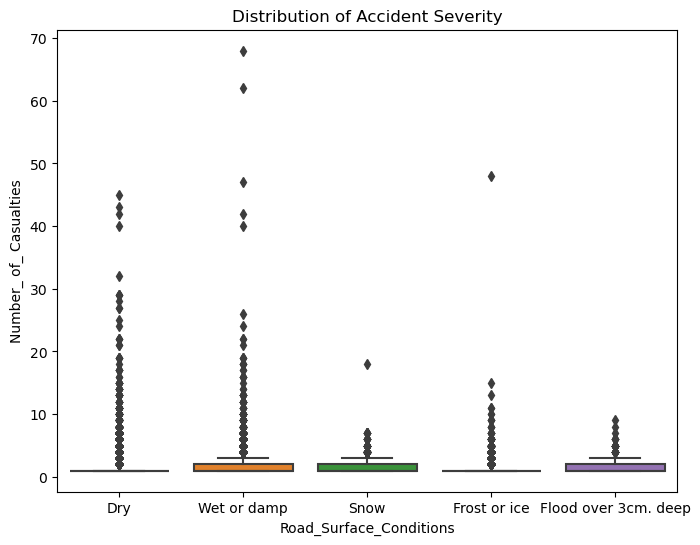

In [13]:
#Boxplot to understand the accident
plt.figure(figsize=(8, 6))
sns.boxplot(x = "Road_Surface_Conditions",y = "Number_of_Casualties",data = df)
plt.xlabel('Road_Surface_Conditions')
plt.ylabel('Number_ of_ Casualties')
plt.title('Distribution of Accident Severity')
plt.show()

# SPLITTING THE DATA

In [22]:
df.loc[:,'accident'] = df['Weather_Conditions'].astype(str) + ' ' + df['Accident_Severity'].astype(str) + ' ' + df['Road_Surface_Conditions'].astype(str).str.strip()


In [15]:
df['accident'].head()

0               Fine no high winds Serious Dry
1    Raining no high winds Serious Wet or damp
3               Fine no high winds Serious Dry
5               Fine no high winds Serious Dry
6               Fine no high winds Serious Dry
Name: accident, dtype: object

In [16]:
accident = df['accident']

In [17]:
accident.head

<bound method NDFrame.head of 0                    Fine no high winds Serious Dry
1         Raining no high winds Serious Wet or damp
3                    Fine no high winds Serious Dry
5                    Fine no high winds Serious Dry
6                    Fine no high winds Serious Dry
                            ...                    
660674                Fine no high winds Slight Dry
660675       Fine no high winds Slight Frost or ice
660676       Fine no high winds Slight Frost or ice
660677       Fine no high winds Serious Wet or damp
660678    Snowing no high winds Serious Wet or damp
Name: accident, Length: 642796, dtype: object>

In [18]:
#Providing the input & output data
#The input data(x,regressor)
x = np.array(df["accident"]).reshape(-1,1)
x.shape


(642796, 1)

In [19]:
#The output data(y,predictor)
y = np.array(df["Number_of_Casualties"])
y.shape


(642796,)

In [20]:
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [23]:
#Exploring the Train & Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((449957, 1), (192839, 1), (449957,), (192839,))

In [ ]:
#For further analysis
print(f"Traning set size : {x_train.shape[0]} samples")
print(f"testing set size : {x_test.shape[0]} samples")